In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time module.
import time


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
karratha au
nador ma
majene id
starkville us
hilo us
busselton au
bethel us
falmouth gb
mataura pf
airai pw
maridi sd
provideniya ru
mayumba ga
kapaa us
lalibela et
rikitea pf
nouadhibou mr
nikolskoye ru
rikitea pf
areosa pt
severo-kurilsk ru
baghdogra in
ushuaia ar
chokurdakh ru
puerto ayora ec
khatanga ru
barao de melgaco br
nantucket us
mataura pf
hobart au
amderma ru
rumford us
beidao cn
cayenne gf
tsihombe mg
avarua ck
hilo us
hilo us
xingcheng cn
cap malheureux mu
sola vu
ushuaia ar
alexandria eg
yellowknife ca
bethel us
necochea ar
rivers ca
progreso mx
vila velha br
tuatapere nz
punta arenas cl
kjollefjord no
ugoofaaru mv
vaini to
kapaa us
boa vista br
ayr au
cabedelo br
mazamet fr
ushuaia ar
upernavik gl
vaini to
tibu co
mataura pf
bengkulu id
lata sb
texarkana us
coquimbo cl
barrow us
belushya guba ru
bambous virieux mu
rikitea pf
mataura pf
puerto ayora ec
nikolskoye ru
nizhneyansk ru
taolanaro mg
vila velha br
jamestown sh
ribeira grande pt
rikitea pf
halifax c

hilo us
severo-kurilsk ru
bluff nz
avarua ck
kapaa us
maceio br
bluff nz
wewak pg
maniitsoq gl
komsomolskiy ru
tasiilaq gl
san policarpo ph
jamestown sh
puerto ayora ec
bethel us
cidreira br
mopti ml
barddhaman in
tshikapa cd
hasaki jp
avarua ck
bereda so
qaanaaq gl
teguise es
arraial do cabo br
jambi id
bluff nz
isangel vu
butaritari ki
puerto cabello ve
panalingaan ph
pontianak id
westport nz
port hueneme us
pundaguitan ph
ushuaia ar
meyungs pw
walvis bay na
hilo us
punta arenas cl
east london za
kapaa us
victoria sc
busselton au
port-cartier ca
trinidad bo
hilo us
nikolskoye ru
kapaa us
ushuaia ar
bluff nz
codrington ag
punta arenas cl
teya ru
mataura pf
bloomfield us
rikitea pf
castro cl
bredasdorp za
sentyabrskiy ru
rikitea pf
cape town za
alice us
cape town za
mandalgovi mn
jiuquan cn
kununurra au
fare pf
rikitea pf
saint-junien fr
avarua ck
severo-kurilsk ru
ushuaia ar
atuona pf
rikitea pf
senneterre ca
saskylakh ru
krasnoselkup ru
cidreira br
kapaa us
kahului us
luderitz na
bus

banmo mm
sibu my
hammerfest no
longyearbyen sj
rikitea pf
tiksi ru
punta arenas cl
high level ca
voi ke
trapani it
severo-yeniseyskiy ru
busselton au
ushuaia ar
jamestown sh
lazaro cardenas mx
provideniya ru
aanekoski fi
rikitea pf
ushuaia ar
puerto el triunfo sv
nantucket us
mataura pf


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=83c9fa3cdd6836031d12ab3ccdbcddd9


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | busselton
Processing Record 2 of Set 12 | karratha
Processing Record 3 of Set 12 | nador
Processing Record 4 of Set 12 | majene
Processing Record 5 of Set 12 | starkville
Processing Record 6 of Set 12 | hilo
Processing Record 7 of Set 12 | bethel
Processing Record 8 of Set 12 | falmouth
Processing Record 9 of Set 12 | mataura
Processing Record 10 of Set 12 | airai
Processing Record 11 of Set 12 | maridi
Processing Record 12 of Set 12 | provideniya
Processing Record 13 of Set 12 | mayumba
Processing Record 14 of Set 12 | kapaa
Processing Record 15 of Set 12 | lalibela
Processing Record 16 of Set 12 | rikitea
Processing Record 17 of Set 12 | nouadhibou
Processing Record 18 of Set 12 | nikolskoye
Processing Record 19 of Set 12 | areosa
Processing Record 20 of Set 12 | severo-kurilsk
Processing Record 21 of Set 12 | baghdogra
Processing Record 22 of Set 12 | ushuaia
Processing Record 23 of Set 12 | chokurdakh
Processing Record 24 of Set 12 | puerto ayora
Pro

Processing Record 32 of Set 15 | mahebourg
Processing Record 33 of Set 15 | warqla
City not found. Skipping...
Processing Record 34 of Set 15 | vila
Processing Record 35 of Set 15 | westport
Processing Record 36 of Set 15 | bani
Processing Record 37 of Set 15 | dzilam gonzalez
Processing Record 38 of Set 15 | capoterra
Processing Record 39 of Set 15 | namibe
Processing Record 40 of Set 15 | banjar
Processing Record 41 of Set 15 | whitehorse
Processing Record 42 of Set 15 | barbar
City not found. Skipping...
Processing Record 43 of Set 15 | grand gaube
Processing Record 44 of Set 15 | mapiri
Processing Record 45 of Set 15 | ulaangom
Processing Record 46 of Set 15 | lasa
Processing Record 47 of Set 15 | tapaua
City not found. Skipping...
Processing Record 48 of Set 15 | broome
Processing Record 49 of Set 15 | san quintin
Processing Record 50 of Set 15 | sakhnovshchyna
Processing Record 1 of Set 16 | corrente
Processing Record 2 of Set 16 | carutapera
Processing Record 3 of Set 16 | nabir

Processing Record 16 of Set 19 | pundaguitan
Processing Record 17 of Set 19 | meyungs
City not found. Skipping...
Processing Record 18 of Set 19 | walvis bay
Processing Record 19 of Set 19 | port-cartier
Processing Record 20 of Set 19 | trinidad
Processing Record 21 of Set 19 | teya
Processing Record 22 of Set 19 | bloomfield
Processing Record 23 of Set 19 | alice
Processing Record 24 of Set 19 | mandalgovi
Processing Record 25 of Set 19 | jiuquan
Processing Record 26 of Set 19 | kununurra
Processing Record 27 of Set 19 | fare
Processing Record 28 of Set 19 | saint-junien
Processing Record 29 of Set 19 | senneterre
Processing Record 30 of Set 19 | krasnoselkup
Processing Record 31 of Set 19 | irtyshskiy
Processing Record 32 of Set 19 | chalchihuites
Processing Record 33 of Set 19 | astoria
Processing Record 34 of Set 19 | yaan
Processing Record 35 of Set 19 | nagua
Processing Record 36 of Set 19 | sharan
Processing Record 37 of Set 19 | alofi
Processing Record 38 of Set 19 | paamiut
Pr

Processing Record 8 of Set 23 | kharan
Processing Record 9 of Set 23 | glens falls
Processing Record 10 of Set 23 | homer
Processing Record 11 of Set 23 | kysyl-syr
Processing Record 12 of Set 23 | saint-leu
Processing Record 13 of Set 23 | buala
Processing Record 14 of Set 23 | egvekinot
Processing Record 15 of Set 23 | constantine
Processing Record 16 of Set 23 | fort nelson
Processing Record 17 of Set 23 | nuuk
Processing Record 18 of Set 23 | karla
Processing Record 19 of Set 23 | denpasar
Processing Record 20 of Set 23 | cazones
Processing Record 21 of Set 23 | conde
Processing Record 22 of Set 23 | saint-francois
Processing Record 23 of Set 23 | sao joao da barra
Processing Record 24 of Set 23 | meridian
Processing Record 25 of Set 23 | yingkou
Processing Record 26 of Set 23 | slave lake
Processing Record 27 of Set 23 | viligili
City not found. Skipping...
Processing Record 28 of Set 23 | sioux lookout
Processing Record 29 of Set 23 | venta
Processing Record 30 of Set 23 | rio gr

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,64.96,81,59,18.48,AU,2021-09-29 04:47:39
1,Karratha,-20.7377,116.8463,86.88,19,0,11.39,AU,2021-09-29 04:48:52
2,Nador,35.1740,-2.9287,61.05,94,51,3.44,MA,2021-09-29 04:54:29
3,Majene,-3.5403,118.9707,86.81,64,96,4.54,ID,2021-09-29 04:54:29
4,Starkville,33.4504,-88.8184,69.46,90,100,3.96,US,2021-09-29 04:54:30
5,Hilo,19.7297,-155.0900,75.25,91,75,3.44,US,2021-09-29 04:47:44
6,Bethel,41.3712,-73.4140,61.16,81,1,3.44,US,2021-09-29 04:47:49
7,Falmouth,50.1544,-5.0711,54.50,74,1,17.56,GB,2021-09-29 04:54:30
8,Mataura,-46.1927,168.8643,46.47,96,88,10.67,NZ,2021-09-29 04:47:35
9,Airai,-8.9266,125.4092,82.08,30,15,3.51,TL,2021-09-29 04:48:09


In [11]:
city_data_df= city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]]

In [12]:
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-09-29 04:47:39,-33.6500,115.3333,64.96,81,59,18.48
1,Karratha,AU,2021-09-29 04:48:52,-20.7377,116.8463,86.88,19,0,11.39
2,Nador,MA,2021-09-29 04:54:29,35.1740,-2.9287,61.05,94,51,3.44
3,Majene,ID,2021-09-29 04:54:29,-3.5403,118.9707,86.81,64,96,4.54
4,Starkville,US,2021-09-29 04:54:30,33.4504,-88.8184,69.46,90,100,3.96
...,...,...,...,...,...,...,...,...,...
542,Trapani,IT,2021-09-29 04:57:30,37.8333,12.6667,73.58,84,58,4.32
543,Severo-Yeniseyskiy,RU,2021-09-29 04:49:47,60.3725,93.0408,36.77,62,100,5.79
544,Lazaro Cardenas,MX,2021-09-29 04:57:30,17.9583,-102.2000,77.47,86,90,3.83
545,Aanekoski,FI,2021-09-29 04:57:31,62.6946,25.8180,42.87,100,15,4.00


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/28/21'

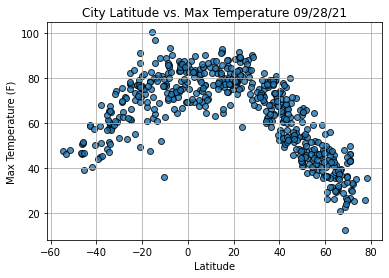

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

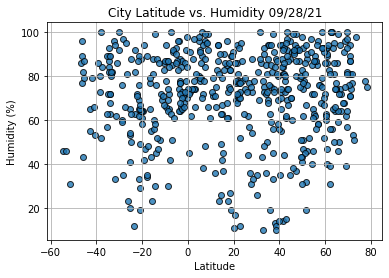

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

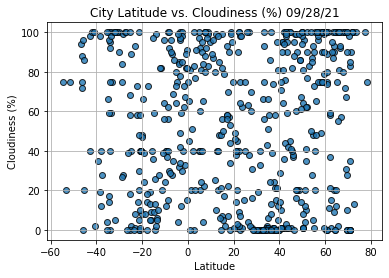

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

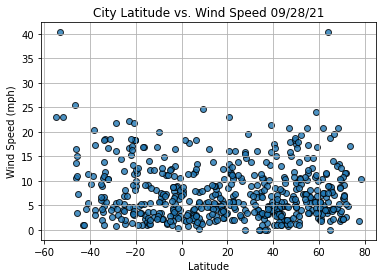

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

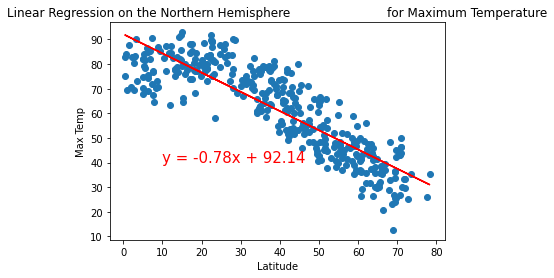

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

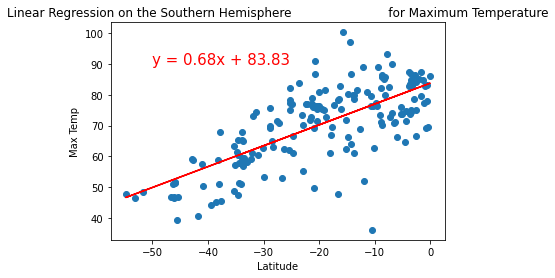

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

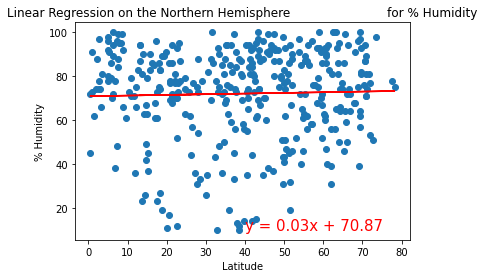

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

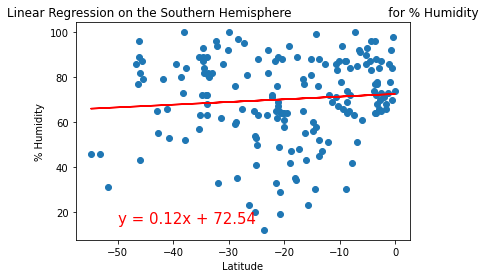

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

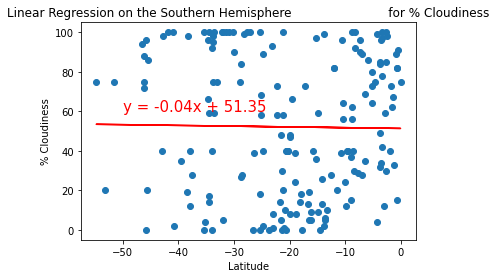

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

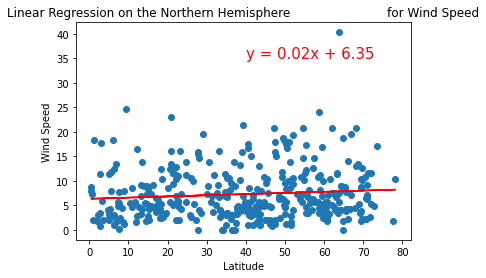

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

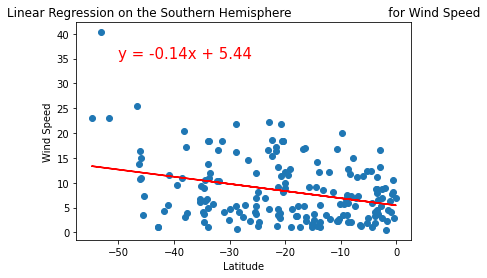

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))